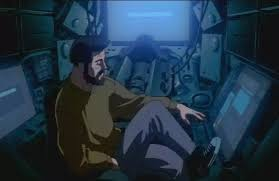

# You ever just wanna idor some stuff ?

In [ ]:
import requests
import pandas as pd 
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


#@title What School?
#@markdown Use the Slider to Choose How Many Iterations and then press the Play button to the left. Press again to stop it..STOP BEFORE CONTINUING.





# a list of discovered subdomains



 
discovered_subdomains = []
status_codes = []

#form variables
school = 'stanford' #@param {type: "string"}
how_many = 101736 #@param {type: "slider", min: 100, max: 1000000}

#@markdown Choose Starting Input

counter = 15074 #@param {type: "integer"}
while counter <= how_many:
  #change counter to string bc I don't like to do it inline
  counter_str = str(counter)
  # construct the url
  url = "https://canvas.{}.edu/courses/".format(school) + counter_str + "/files/"
  
  callin_get = requests.get(url)
  try:
      # if this raises an ERROR, that means the subdomain does not exist
      callin_get
  except requests.ConnectionError:
      # if the subdomain does not exist, just pass, print nothing
        
      pass
  else:
      
      # append the discovered subdomain to our list
     
          print(url)
          discovered_subdomains.append(url)
          status_codes.append(callin_get.status_code)
              
  counter += 1




In [ ]:
#@title Wanna See? { display-mode: "form" }
#@markdown Just Press Play

#loading and showing pandas dataframe

df = pd.DataFrame (list(zip(discovered_subdomains, status_codes)), columns = ['URL', 'Status Code'])
df.head(100)

,URL,Status Code
0,https://canvas.stanford.edu/courses/15074/files/,400
1,https://canvas.stanford.edu/courses/15075/files/,400
2,https://canvas.stanford.edu/courses/15076/files/,400
3,https://canvas.stanford.edu/courses/15077/files/,400
4,https://canvas.stanford.edu/courses/15078/files/,400
...,...,...
95,https://canvas.stanford.edu/courses/15169/files/,400
96,https://canvas.stanford.edu/courses/15170/files/,400
97,https://canvas.stanford.edu/courses/15171/files/,400
98,https://canvas.stanford.edu/courses/15172/files/,400


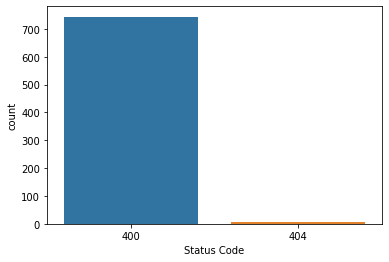

In [ ]:
#@title Wanna See a Barplot that counts by status code ? { display-mode: "form" }


sns.countplot(data=df, x='Status Code')

In [ ]:
#@title Input the name you would like your downloaded .csv file to have. No spaces fuck boi. Press play after. { display-mode: "form" }

name = 'stanford_starting_at_15074' #@param {type: "string"}
df.to_csv('sample.csv')
from google.colab import files
files.download(name)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>